In [1]:
import pickle
import matplotlib.pyplot as plt
# Notes: 
# Plot stage 0 total-trials minus violations

#pwm = A_df.copy()
#pwm.head()
#pwm1 = pwm.reset_index()
#pwm1.head()
#mask = pwm['stage']== 0
#pwm1 = pwm[mask]
#print(pwm1)
#pwm1 = pwm[pwm.stage==0]
#pwm1.head()
#print(pwm1)
#pwm2 = pwm1.unstack()
#pwm2.head()
#pwm2[pwm2.stage== 0]
#print(idx)

#stage_0 = pwm.loc[pwm['stage']==0]

#print(pwm[pwm['stage']==0])
#print(pwm_stage0)

#idx = pwm[pwm['stage'==0]].index.tolist()
#print(idx)
#print(idx[:])
#print(idx[-1])
#print(len(idx))
#pwm_idx = pwm.loc[idx[0]:'2019-05-20']
#print(pwm_idx)
# ideally find the index for stage = 0 and use this for the plotting
#pwm_stage0_cp.plot(marker='o',linewidth = 1.0, markersize = 2.5,cmap=plt.cm.RdPu)
#plt.xticks(rotation = 75, fontsize= 'medium')
#plt.xlim(['2019-04-26','2019-05-20'])
#print(plt.get_xlim*())
#plt.ylabel('Done Trials')
#plt.xlabel('Date')
#plt.title('Stage 0: Done trials for PWM animals')
#print(pwm_stage0_cp.index)


# load in file

In [2]:
pickle_in = open("Rot3_data\\Rat_full_df.pkl","rb")
pwm = pickle.load(pickle_in)
pwm = pwm.sort_index()  # sort according to index, this should sort according to date
print("Succesfully loaded full rat dateframe as pwm")
pwm = pwm.rename_axis(['animal','date2'])  #Add labels for Multi-index
# Fix stages problem!!
mask = (pwm['stage']==1)&(pwm['A2_time']>0)
pwm['stage']=pwm['stage'].mask(mask,2)
pwm.head()
print(pwm.index)
# Include only animals which are on the PWM (s
# hould make this dependent on their settings file in the future
pwm = pwm.loc[['AA02','AA04','AA06','AA08','DO01','DO02','DO05','DO06','SC01','SC02','SC03','SC06','VP02','VP03','VP06']]



Succesfully loaded full rat dateframe as pwm
MultiIndex([('AA01', '2019-04-24'),
            ('AA01', '2019-04-24'),
            ('AA01', '2019-04-25'),
            ('AA01', '2019-04-26'),
            ('AA01', '2019-04-29'),
            ('AA01', '2019-04-30'),
            ('AA01', '2019-05-01'),
            ('AA01', '2019-05-02'),
            ('AA01', '2019-05-03'),
            ('AA01', '2019-05-07'),
            ...
            ('sc04', '2019-04-25'),
            ('sc04', '2019-04-26'),
            ('sc04', '2019-04-29'),
            ('sc04', '2019-04-30'),
            ('sc04', '2019-05-01'),
            ('sc04', '2019-05-02'),
            ('sc04', '2019-05-03'),
            ('sc04', '2019-05-07'),
            ('sc04', '2019-05-08'),
            ('sc04', '2019-05-09')],
           names=['animal', 'date2'], length=1594)


In [4]:
%matplotlib inline
A_df = pwm # use the pwm dataframe
A_df = A_df.swaplevel('animal','date2')
A_df = A_df.reset_index()  # In order to delete duplicates 
# remove duplicates
dup_r = A_df[A_df.duplicated(['date2','animal'])]
print('dub is:',dup_r)
A_df = A_df.drop_duplicates(['date2','animal'])
dup_r = A_df[A_df.duplicated(['date2','animal'])]  # Run a little double check
print('dub is:',dup_r)
# Put the dataframe nicely together again
A_df = A_df.set_index(['date2','animal'])
A_df = A_df.sort_index()
A_df = A_df.unstack()
A_df.head()



dub is:           date2 animal                                           file  \
85   2019-06-11   AA04  data_@AthenaDelayComp_athena_AA04_190611b.mat   
86   2019-06-11   AA04  data_@AthenaDelayComp_athena_AA04_190611c.mat   
208  2019-07-04   AA08  data_@AthenaDelayComp_athena_AA08_190704c.mat   
269  2019-04-25   DO02   data_@AthenaDelayComp_dammy_DO02_190425b.mat   
270  2019-04-25   DO02   data_@AthenaDelayComp_dammy_DO02_190425c.mat   
271  2019-04-25   DO02   data_@AthenaDelayComp_dammy_DO02_190425d.mat   
365  2019-06-26   DO05   data_@AthenaDelayComp_dammy_DO05_190626c.mat   
373  2019-07-05   DO05   data_@AthenaDelayComp_dammy_DO05_190705b.mat   
763  2019-05-30   VP06  data_@AthenaDelayComp_viktor_VP06_190530b.mat   

                                         settings_file experimenter animal_id  \
85   C:\ratter\SoloData\Settings\athena\AA04\settin...       athena      AA04   
86   C:\ratter\SoloData\Settings\athena\AA04\settin...       athena      AA04   
208               

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="10" halign="left">file</th>
      <th>...</th>
      <th colspan="10" halign="left">hits_total</th>
    </tr>
    <tr>
      <th>animal</th>
      <th>AA02</th>
      <th>AA04</th>
      <th>AA06</th>
      <th>AA08</th>
      <th>DO01</th>
      <th>DO02</th>
      <th>DO05</th>
      <th>DO06</th>
      <th>SC01</th>
      <th>SC02</th>
      <th>...</th>
      <th>DO02</th>
      <th>DO05</th>
      <th>DO06</th>
      <th>SC01</th>
      <th>SC02</th>
      <th>SC03</th>
      <th>SC06</th>
      <th>VP02</th>
      <th>VP03</th>
      <th>VP06</th>
    </tr>
    <tr>
      <th>date2</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2019-04-25</th>
      <td>data_@AthenaDelayComp_athena_AA02_190425a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA04_190425a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA06_190425a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA08_190425a.mat</td>
      <td>data_@AthenaDelayComp_dammy_DO01_190425a.mat</td>
      <td>data_@AthenaDelayComp_dammy_DO02_190425a.mat</td>
      <td>data_@AthenaDelayComp_dammy_DO05_190425a.mat</td>
      <td>NaN</td>
      <td>data_@AthenaDelayComp_sharbat_SC01_190425a.mat</td>
      <td>data_@AthenaDelayComp_sharbat_SC02_190425a.mat</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>NaN</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2019-04-26</th>
      <td>data_@AthenaDelayComp_athena_AA02_190426a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA04_190426a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA06_190426a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA08_190426_ASV.mat</td>
      <td>data_@AthenaDelayComp_dammy_DO01_190426a.mat</td>
      <td>data_@AthenaDelayComp_dammy_DO02_190426a.mat</td>
      <td>data_@AthenaDelayComp_dammy_DO05_190426a.mat</td>
      <td>NaN</td>
      <td>data_@AthenaDelayComp_sharbat_SC01_190426a.mat</td>
      <td>data_@AthenaDelayComp_sharbat_SC02_190426a.mat</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>NaN</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2019-04-29</th>
      <td>data_@AthenaDelayComp_athena_AA02_190429a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA04_190429a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA06_190429a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA08_190429a.mat</td>
      <td>data_@AthenaDelayComp_dammy_DO01_190429a.mat</td>
      <td>data_@AthenaDelayComp_dammy_DO02_190429a.mat</td>
      <td>data_@AthenaDelayComp_dammy_DO05_190429a.mat</td>
      <td>NaN</td>
      <td>data_@AthenaDelayComp_sharbat_SC01_190429a.mat</td>
      <td>data_@AthenaDelayComp_sharbat_SC02_190429a.mat</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>NaN</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2019-04-30</th>
      <td>data_@AthenaDelayComp_athena_AA02_190430a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA04_190430a.mat</td>
      <td>data_@AthenaDelayComp_athena_AA06_190430a.mat</td>

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['axes.facecolor'] = '555555'
plt.rcParams['text.color'] = 'white'
#plt.rcParams['axes.prop_cycle'] = 'RdPu' # this dosen't do anything atm 
# for individual: ax.set_axis_bgcolor('')



Text(0.5,1,'Total_CP over time for each animal')

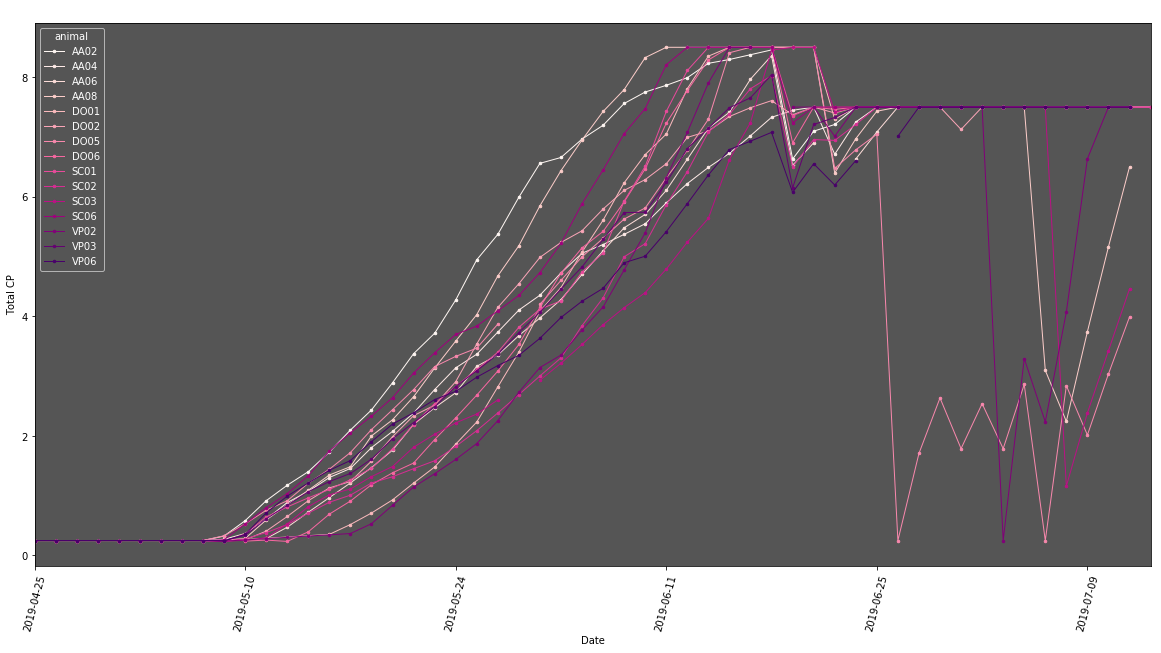

In [7]:
A_cp = A_df['total_CP']
A_cp.head()
A_cp.plot(marker='o',linewidth = 1.0, markersize = 2.5,cmap=plt.cm.RdPu)
plt.xticks( rotation = 75, fontsize= 'medium')
plt.ylabel('Total CP')
plt.xlabel('Date')
plt.title('Total_CP over time for each animal')



Text(0.5,1,'Stage 0: Done trials for PWM animals')

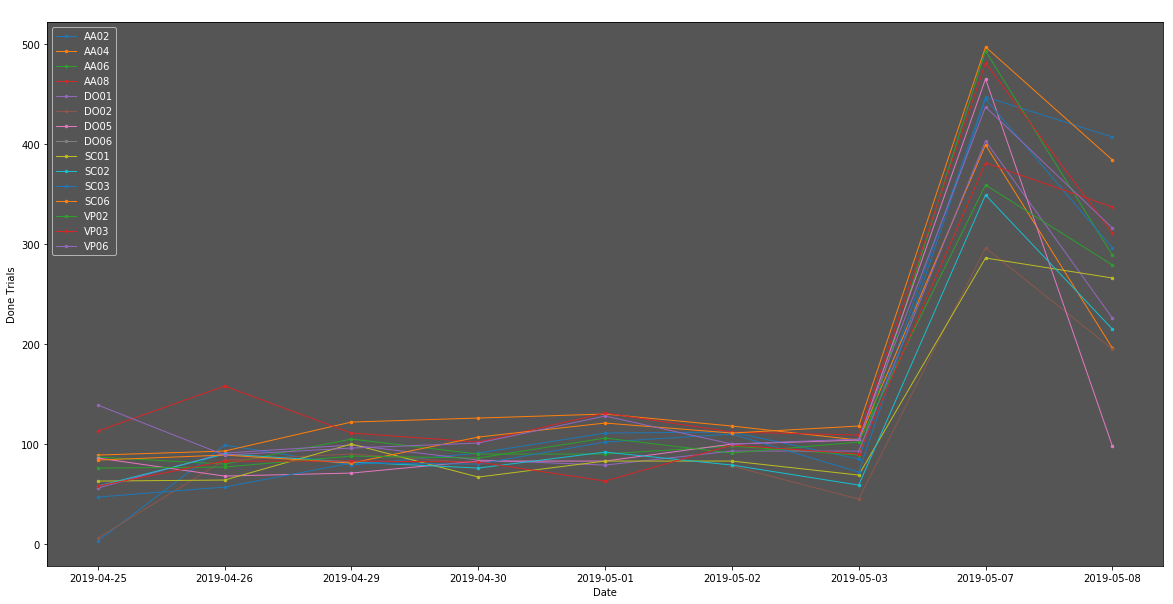

In [9]:
pwm = A_df.copy()
mask = pwm['stage']== 0
pwm1 = pwm[mask]
pwm_stage0 = pwm1
pwm_stage0.head()
pwm_stage0_cp = pwm_stage0['done_trials']
# pwm_real = pwm_stage0['done_trials'] - (pwm_stage0['done_trials']* pwm_stage0['violations'])
# would maybe be an idea to perform this operation higher up. 
list = pwm_stage0_cp.columns.values # get list to use for labelling
# plt.plot instead of df.plot fixed my problem with the x-axis, but the colors are worse, and legends are gone
# ideally figure out how to fix things in either
plt.plot(pwm_stage0_cp, marker='o',linewidth = 1.0, markersize = 2.5) #cmap=plt.cm.RdPu)
plt.legend(list)
plt.ylabel('Done Trials') 
plt.xlabel('Date')
plt.title('Stage 0: Done trials for PWM animals')
# figure out:
# how to change line colors by making a loop
# colormap = cmap=plt.cm.RdPu



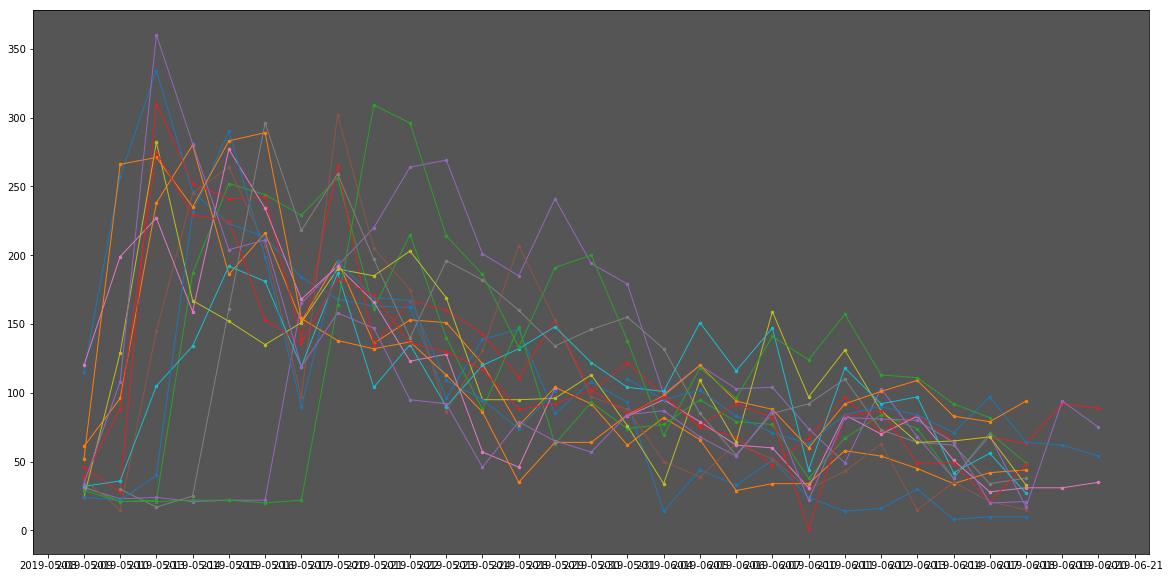

In [19]:
# Stage 1 
pwm_st1 = A_df.copy()
mask = pwm_st1['stage']== 1
pwm_stage1 = pwm_st1[mask]
pwm_stage1_dt = pwm_stage1['done_trials'] - (pwm_stage1['done_trials']* pwm_stage1['violations'])
plt.plot(pwm_stage1_dt, marker='o',linewidth = 1.0, markersize = 2.5)


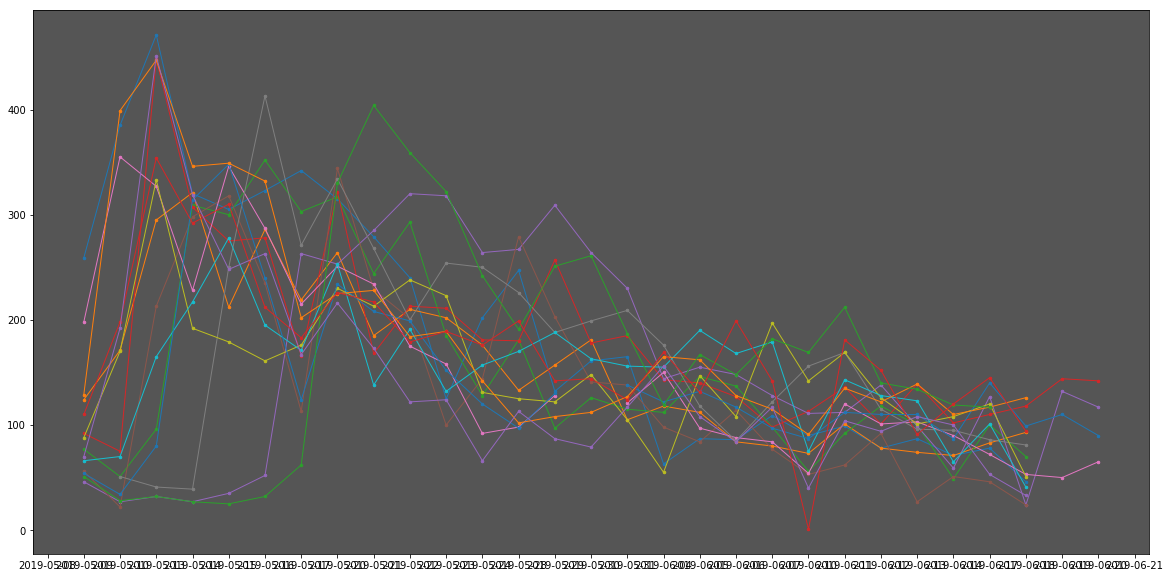

In [20]:
pwm_stage1_dt2 = pwm_stage1['done_trials']
plt.plot(pwm_stage1_dt2, marker='o',linewidth = 1.0, markersize = 2.5)